# Post pruning decision trees with cost complexity pruning

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [35]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
pred = clf.predict(X_test)

In [37]:
from sklearn.metrics  import confusion_matrix

In [38]:
confusion_matrix(y_test, pred)

array([[50,  3],
       [14, 76]], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, pred)

0.8811188811188811

In [41]:
from sklearn import tree

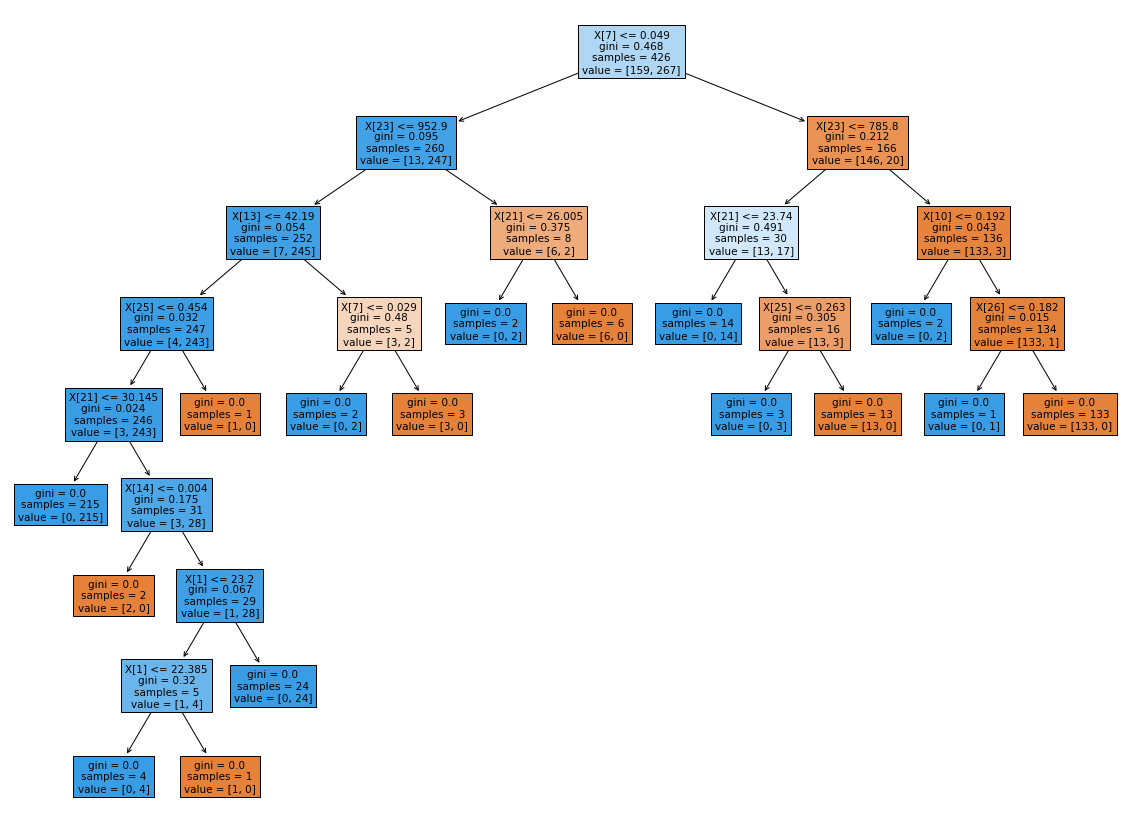

In [42]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf, filled=True);

In [43]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]


In [44]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(f"Number of nodes in the last tress is : {clfs[-1].tree_.node_count}, with ccp_alpha: {ccp_alphas[-1]}")

Number of nodes in the last tress is : 1, with ccp_alpha: 0.3272984419327777


## Accuracy vs alpha for training and testing sets

In [45]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

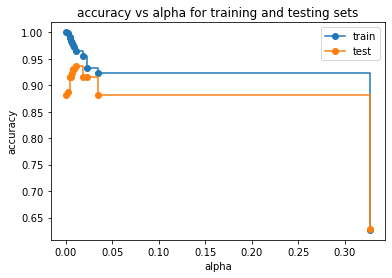

In [46]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [47]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [51]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test, pred)

array([[52,  1],
       [ 8, 82]], dtype=int64)

In [52]:
accuracy_score(y_test, pred)

0.9370629370629371

In [53]:
from sklearn.tree import plot_tree

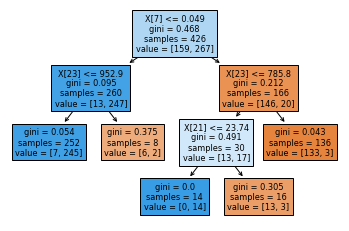

In [55]:
plot_tree(clf, filled=True);